In [33]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
data1=pd.read_csv(" heart.csv")
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
display(data1.describe())
display(data1.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

In [8]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

target_col = ["output"]
target_data=data1[target_col]

data1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

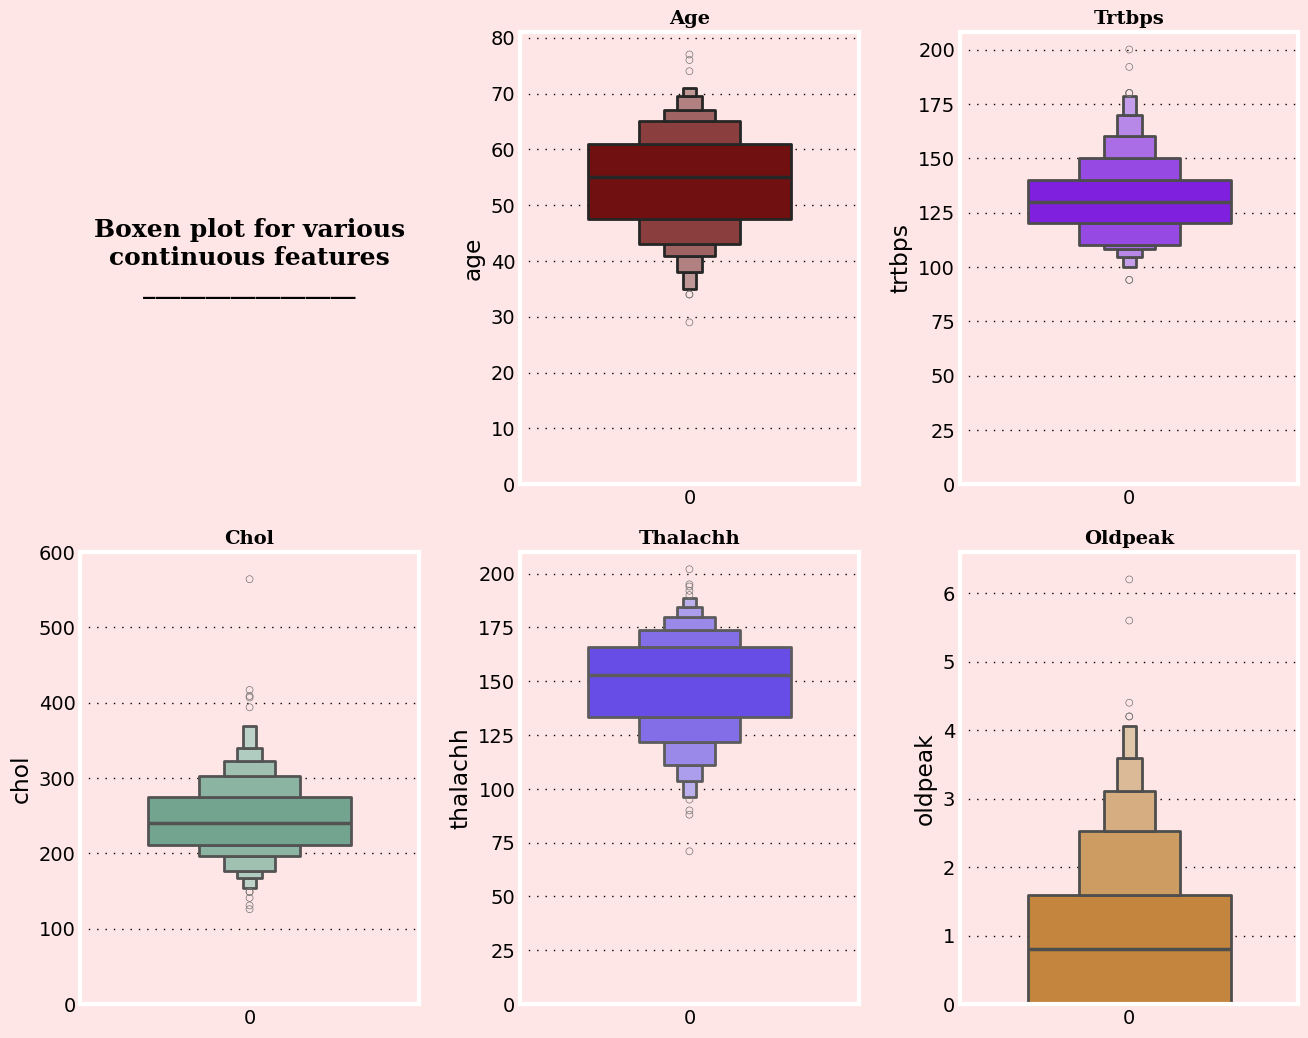

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 2 rows and 3 columns, adjust spacing
fig, axes = plt.subplots(2, 3, figsize=(14, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.15)

# Background and color settings
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
features = ['Age', 'Trtbps', 'Chol', 'Thalachh', 'Oldpeak']
y_limits = [(0, 81), (0, 208), (0, 600), (0, 210), (0, 6.6)]

# Set background for figure and axes
fig.patch.set_facecolor(background_color)
for ax in axes.flat:
    ax.set_facecolor(background_color)
    ax.tick_params(colors='black')  # Set tick color to black

# Add title in the first subplot
axes[0, 0].axis('off')  # Hide ticks and labels
axes[0, 0].text(0.5, 0.5, 'Boxen plot for various\ncontinuous features\n_________________',
               ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")

# Plot each feature in the remaining subplots
for i, ax in enumerate(axes.flat[1:]):
    ax.set_ylim(y_limits[i])
    ax.set_title(features[i], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
    sns.boxenplot(x=[0] * len(data1), y=data1[features[i].lower()], hue=[0] * len(data1), 
                  palette=[color_palette[i]], ax=ax, width=0.6, legend=False)
    ax.grid(color='#000000', linestyle=':', axis='y', dashes=(1, 5))
    ax.xaxis.label.set_color('black')  # X-axis label color
    ax.yaxis.label.set_color('black')  # Y-axis label color

plt.show()


output
1    165
0    138
Name: count, dtype: int64


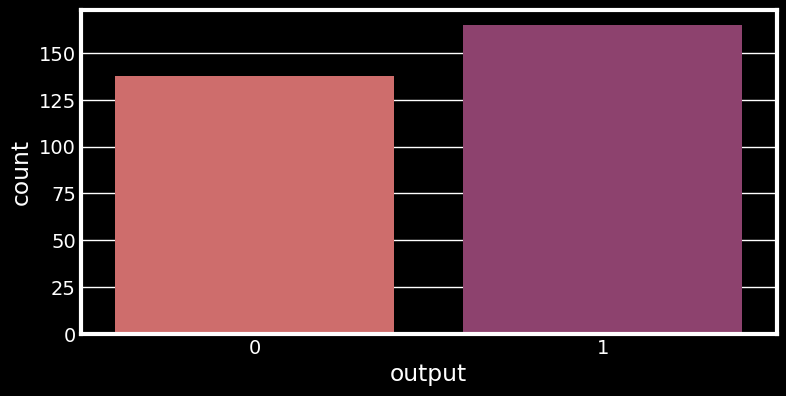

In [22]:
# Output variable
print(data1['output'].value_counts())

# Plotting the count plot for the 'output' variable
fig = plt.figure(figsize=(8,4))
sns.countplot(x="output", data=data1, hue="output", palette='flare', legend=False)  # Updated with hue='output' and legend=False
plt.show()


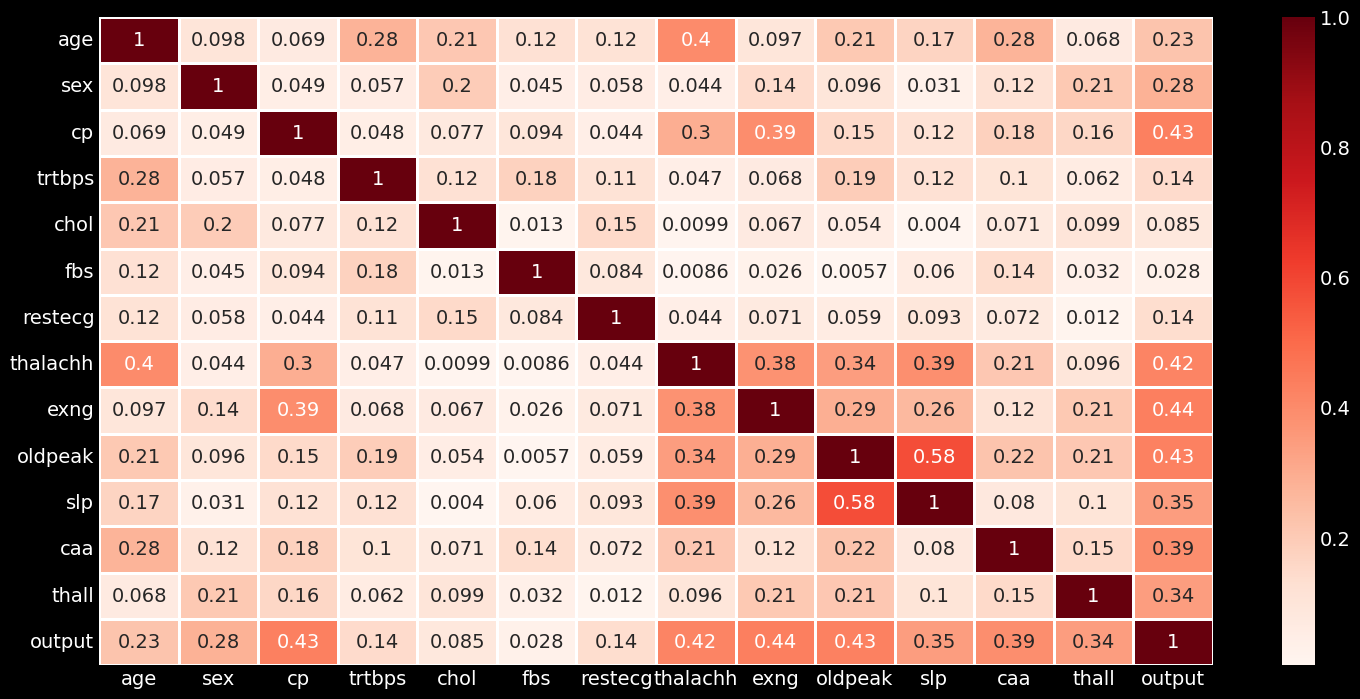

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


In [32]:
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)

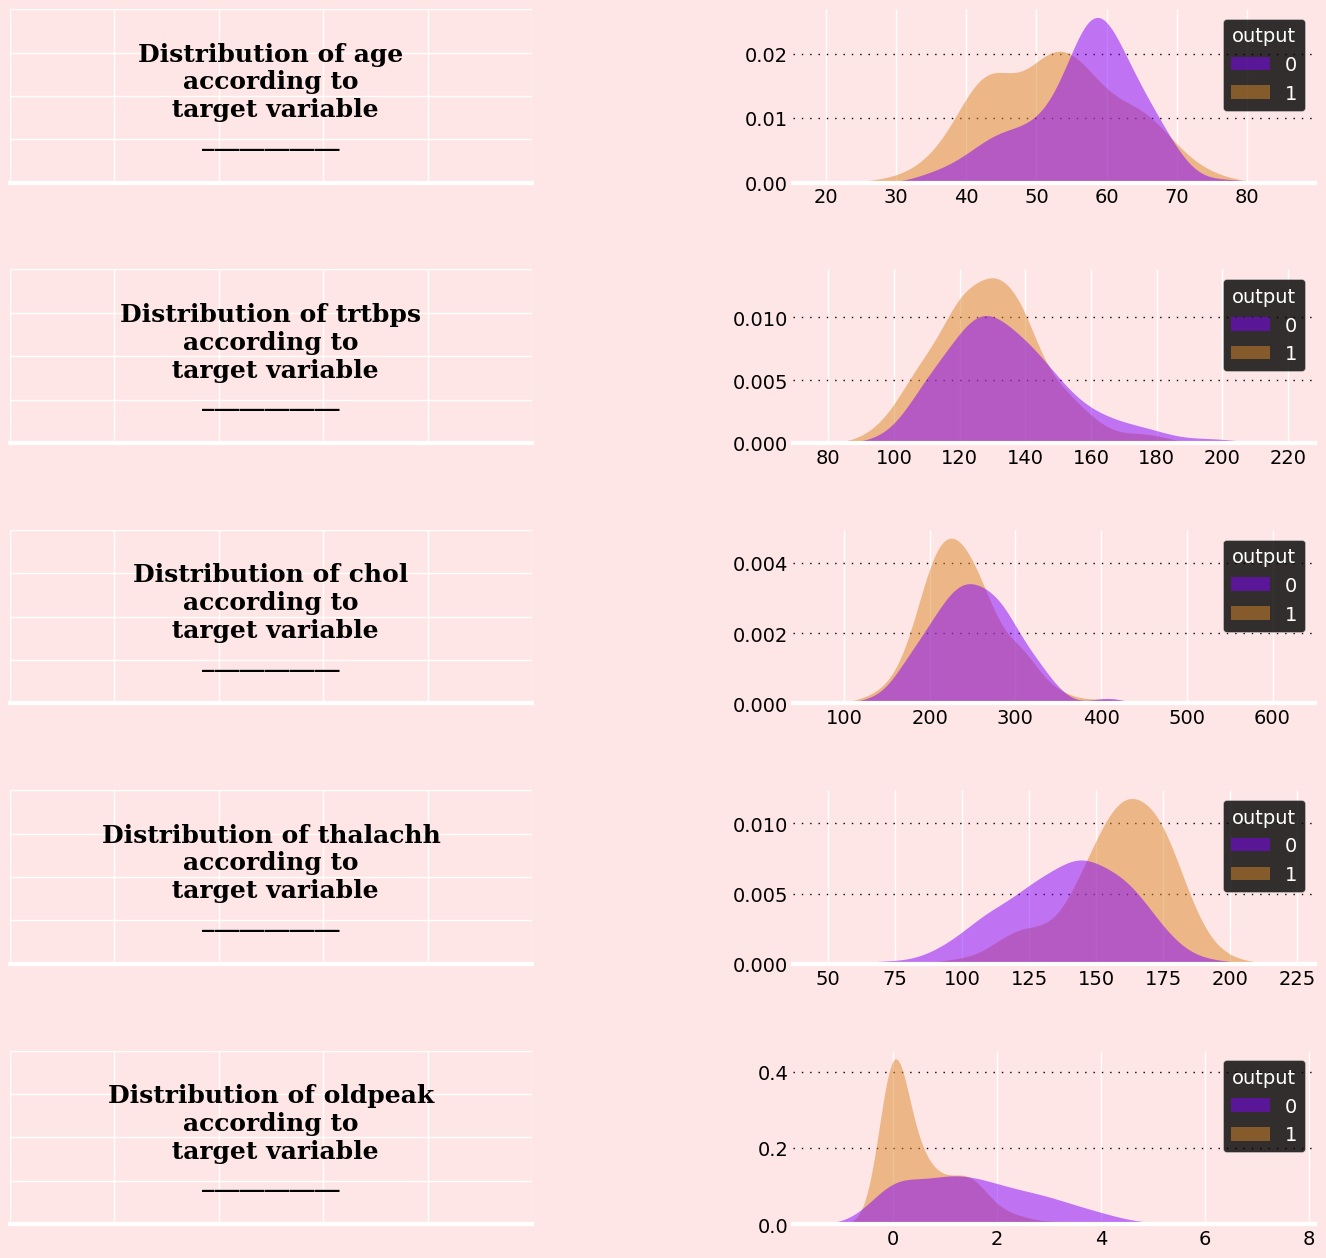

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and grid
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

# Titles and features for each subplot
titles = ["Distribution of age", "Distribution of trtbps", "Distribution of chol",
          "Distribution of thalachh", "Distribution of oldpeak"]
features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
palette = ["#8000ff", "#da8829"]

# Set up each subplot
for i, ax in enumerate(axes.flatten()):
    ax.set_facecolor(background_color)
    ax.tick_params(colors='black')
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
    
    if i % 2 == 0:  # Title plots (left column)
        ax.text(0.5, 0.5, f"{titles[i // 2]}\naccording to\n target variable\n___________",
                ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif', color='#000000')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
    else:  # KDE plots (right column)
        ax.grid(color='black', linestyle=':', axis='y', dashes=(1, 5))
        sns.kdeplot(ax=ax, data=data1, x=features[i // 2], hue="output", fill=True, palette=palette, alpha=0.5, linewidth=0)
        ax.set_xlabel("")
        ax.set_ylabel("")

plt.show()


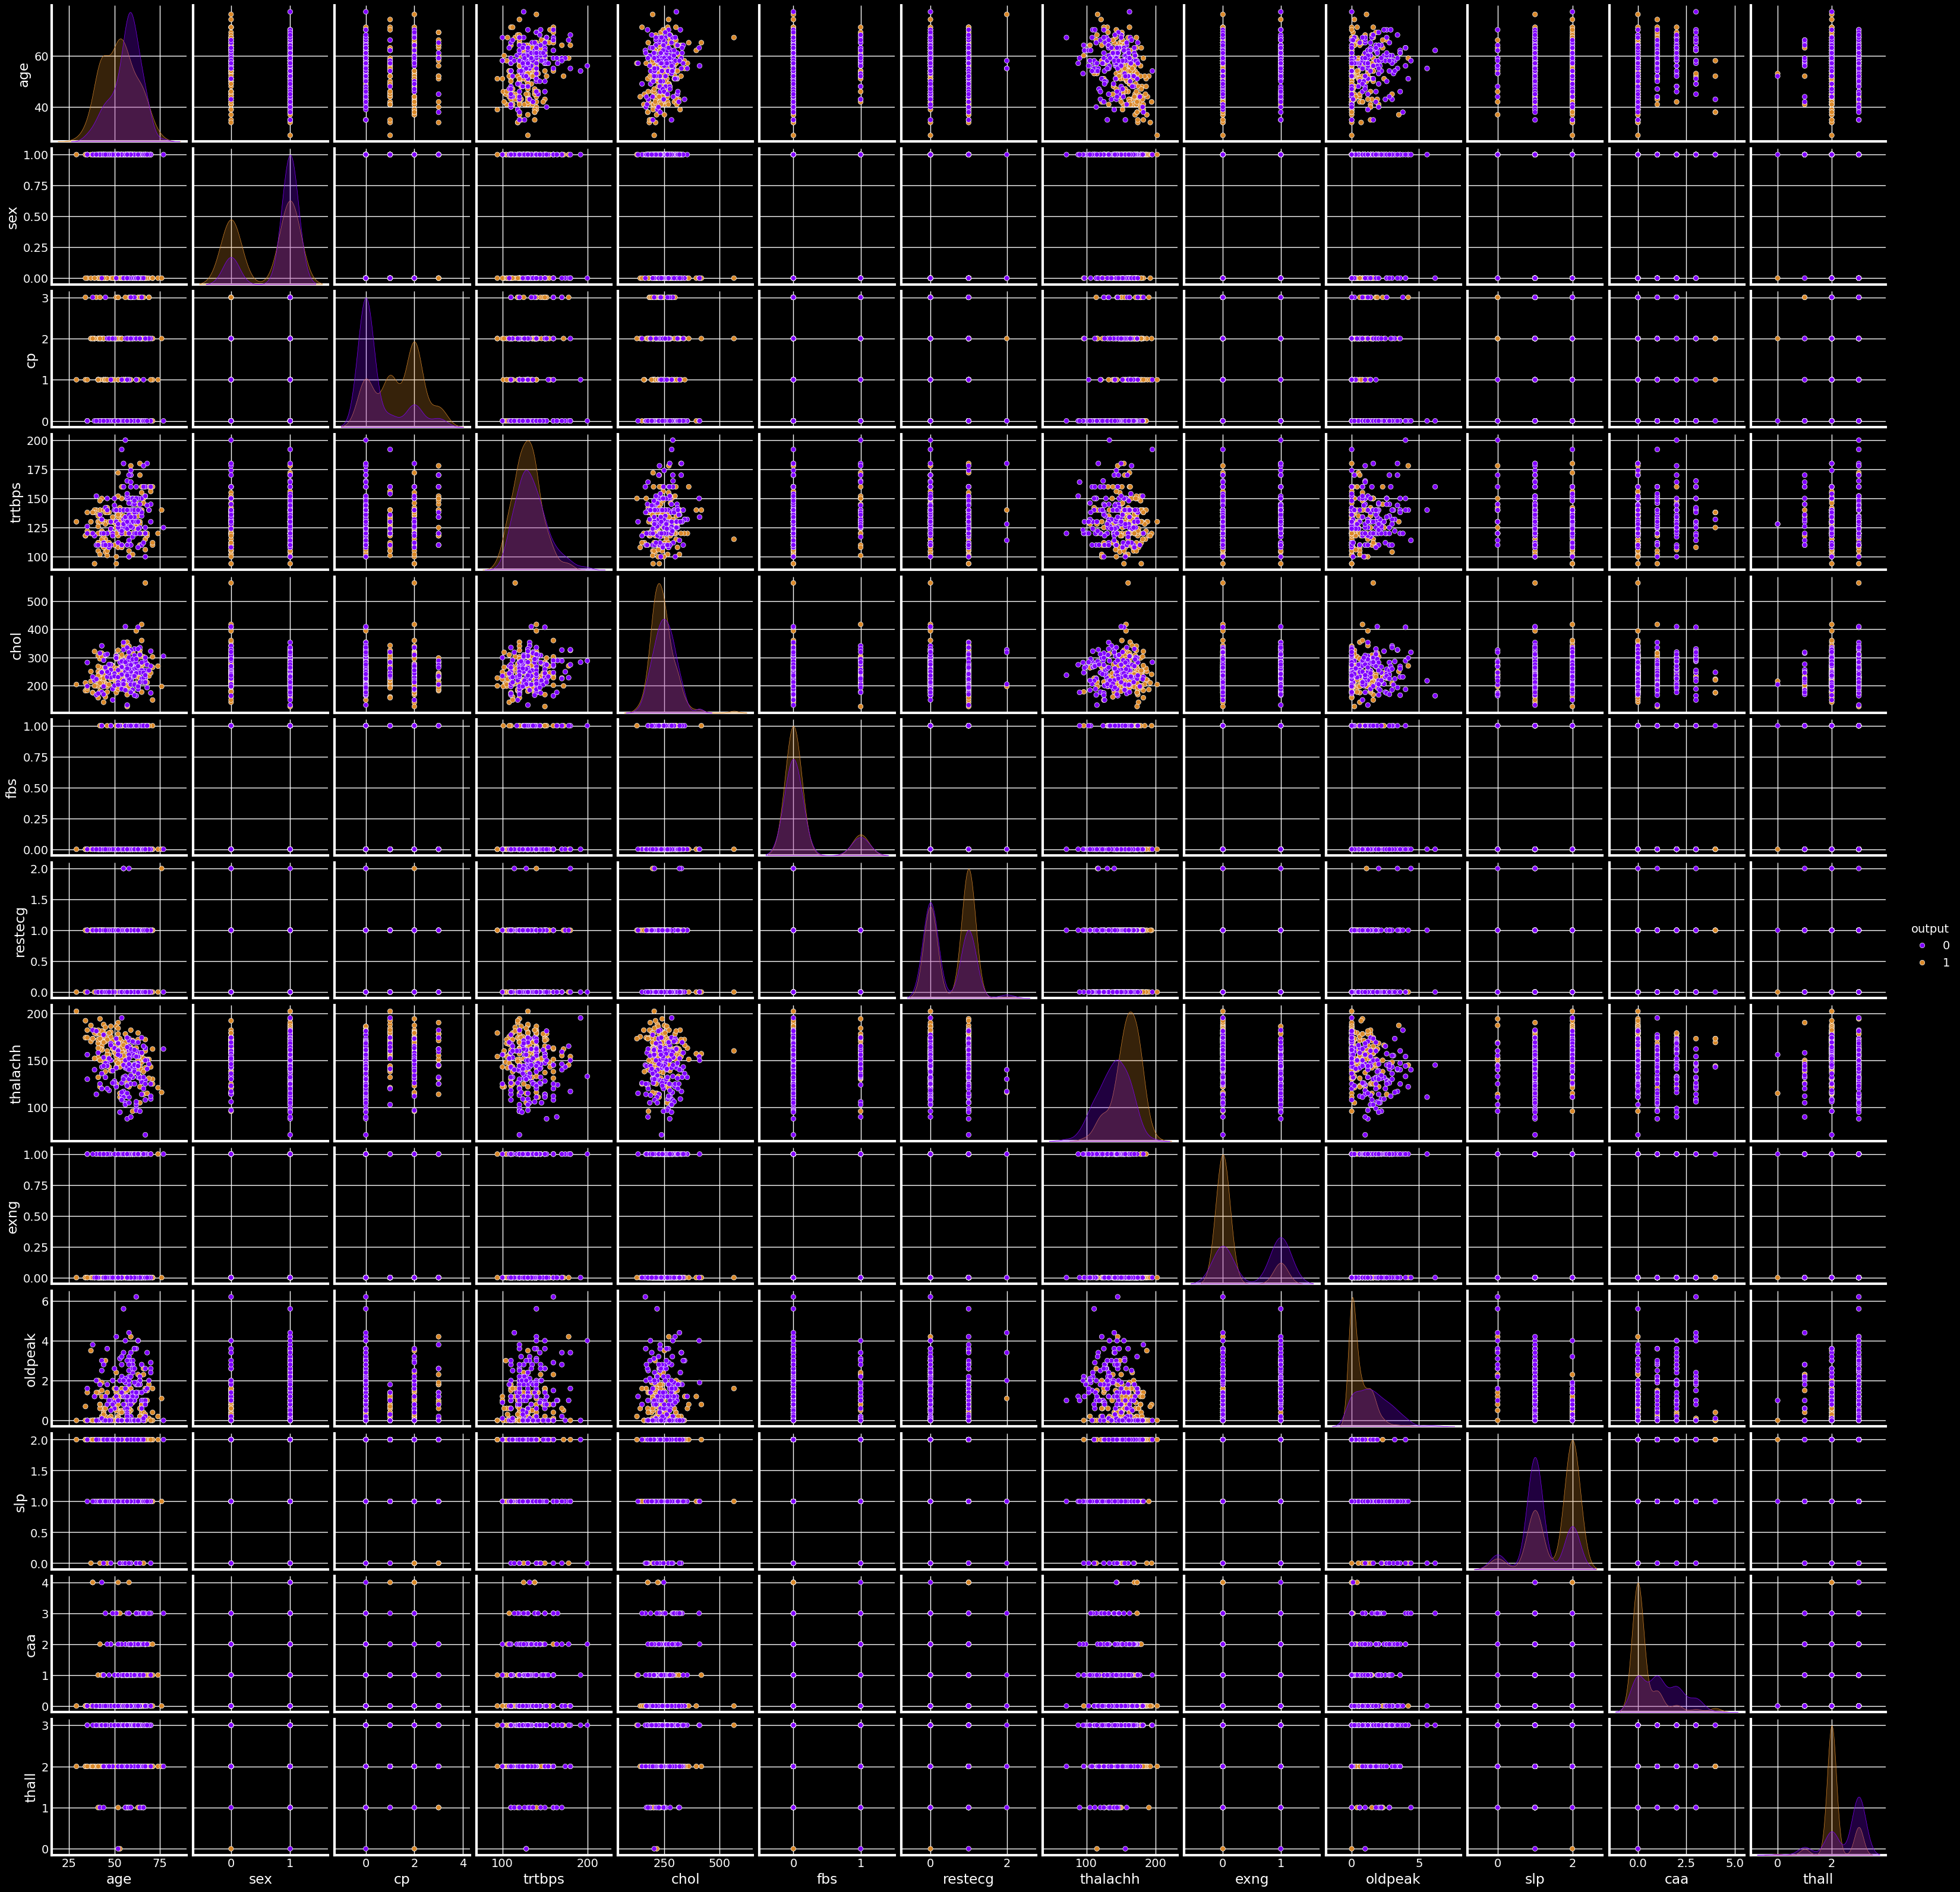

In [28]:
sns.pairplot(data1,hue='output',palette = ["#8000ff","#da8829"])
plt.show()